<h1>Car Price Prediction using Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

<h3>Gathering Data

In [2]:
import urllib.request

url = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv"
filename = url.split("/")[-1]

urllib.request.urlretrieve(url, filename)


('data.csv', <http.client.HTTPMessage at 0x202b848a9b0>)

<h3>Loading Data

In [3]:
df = pd.read_csv('data.csv')
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


<h3>Data Preparation

In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head(5)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [6]:
df.shape

(11914, 16)

In [7]:
strings = list(df.dtypes[df.dtypes == 'object'].index)

for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

df.head(5)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


<h3>EDA

In [8]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:3])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat']
48

model
['1_series_m' '1_series' '100']
914

year
[2011 2012 2013]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)']
10

engine_hp
[335. 300. 230.]
356

engine_cylinders
[6. 4. 5.]
9

transmission_type
['manual' 'automatic' 'automated_manual']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive']
4

number_of_doors
[2. 4. 3.]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan']
16

highway_mpg
[26 28 27]
59

city_mpg
[19 20 18]
69

popularity
[3916 3105  819]
48

msrp
[46135 40650 36350]
6049



In [9]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [10]:
# Analyzing features missing pattern
def analyze_missing_data(df):
    missing = pd.DataFrame({
        'count': df.isnull().sum(),
        'percent': (df.isnull().sum() / len(df)) * 100
    }).sort_values('percent', ascending=False)
    
    # Only show columns with missing values
    missing = missing[missing['count'] > 0]
    
    print("Missing Data Analysis:")
    print(missing)

analyze_missing_data(df)

Missing Data Analysis:
                  count    percent
market_category    3742  31.408427
engine_hp            69   0.579151
engine_cylinders     30   0.251805
number_of_doors       6   0.050361
engine_fuel_type      3   0.025180


In [ ]:
# Filling missing values
def handle_missing_values(df):
    df = df.copy()
    
    # Creating a new category 'not_specified'
    df['market_category'].fillna('not_specified', inplace=True)
    
    # Impute based on similar models
    df['engine_hp'] = df.groupby(['model', 'year'])['engine_hp'].transform(
        lambda x: x.fillna(x.median()))
    # If still missing, fill with overall median
    df['engine_hp'].fillna(df['engine_hp'].median(), inplace=True)
    
    # Impute based on engine_hp
    df['engine_cylinders'] = df.groupby('engine_hp')['engine_cylinders'].transform(
        lambda x: x.fillna(x.median()))
    df['engine_cylinders'].fillna(df['engine_cylinders'].median(), inplace=True)
    
    # Fill with mode
    df['number_of_doors'].fillna(df['number_of_doors'].mode()[0], inplace=True)
    
    # Fill with mode
    df['engine_fuel_type'].fillna(df['engine_fuel_type'].mode()[0], inplace=True)
    
    return df

In [12]:
df.describe()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


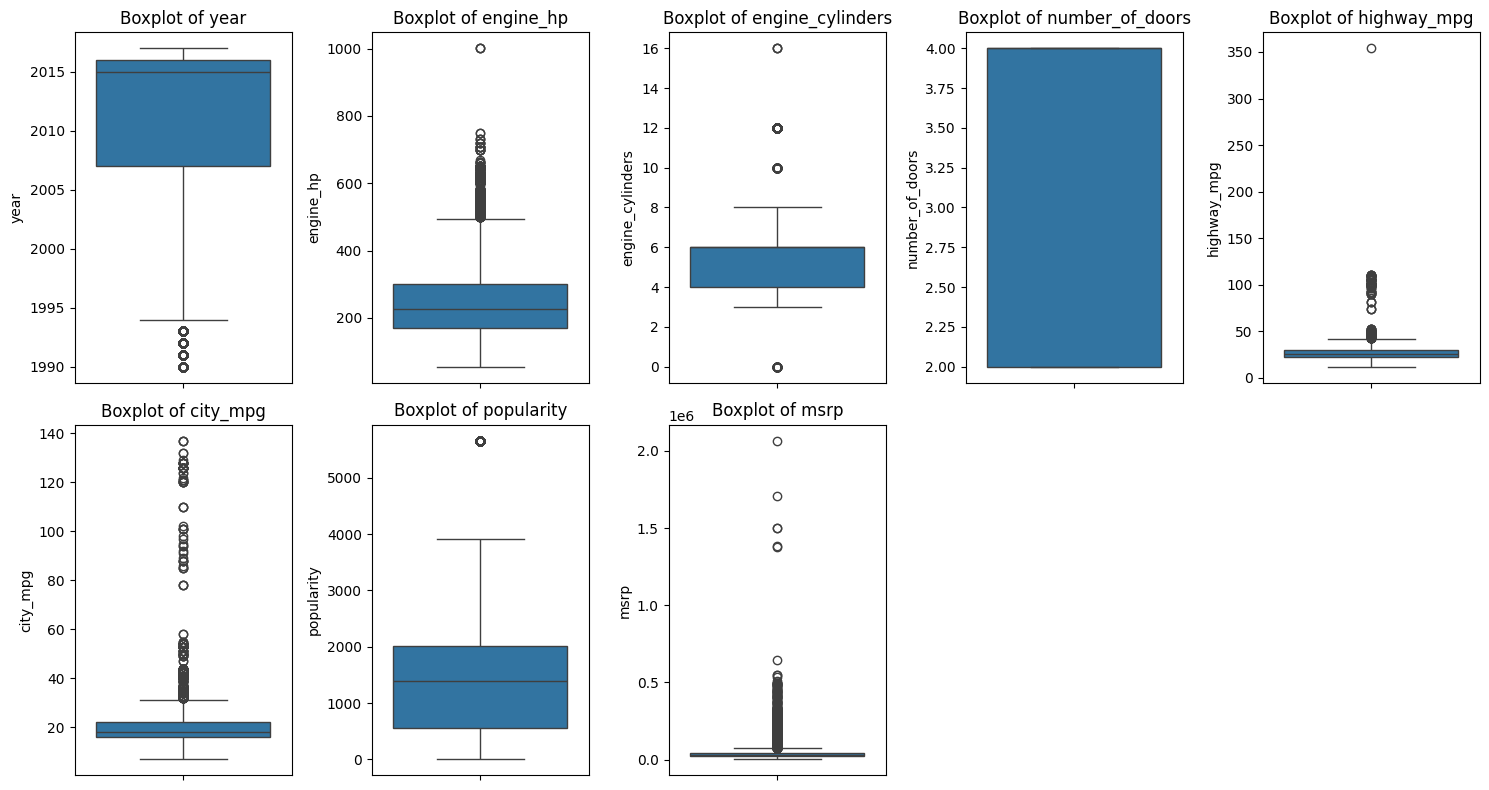

In [13]:
# Checking for outliers in numerical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, len(numeric_cols)//2 + 1, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

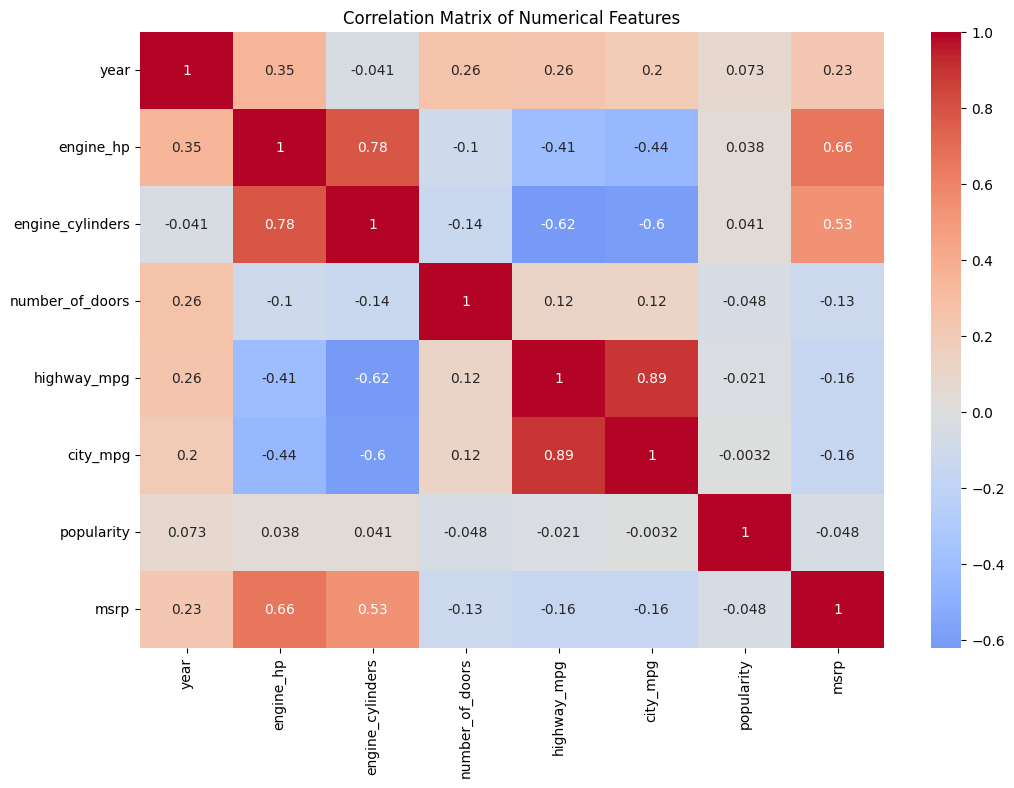

In [14]:
# Correlation analysis of numerical columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

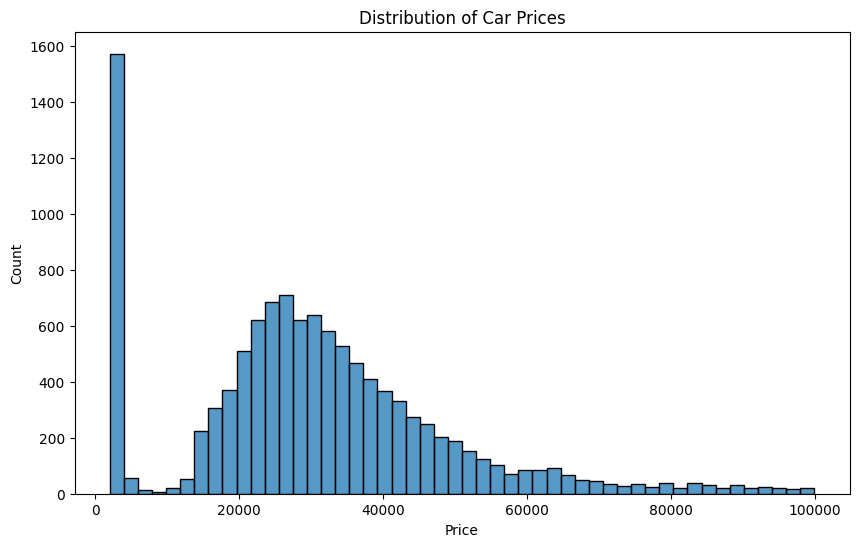

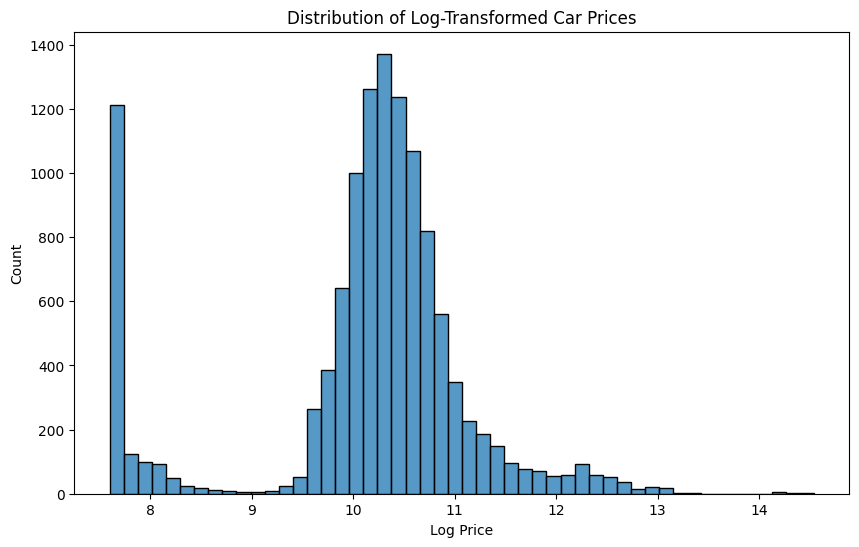

In [15]:
# Checking distribution of Price 
plt.figure(figsize=(10, 6))
sns.histplot(df.msrp[df.msrp < 100000], bins=50)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

# Log transform price for better distribution
df['log_price'] = np.log1p(df['msrp'])

plt.figure(figsize=(10, 6))
sns.histplot(df['log_price'], bins=50)
plt.title('Distribution of Log-Transformed Car Prices')
plt.xlabel('Log Price')
plt.ylabel('Count')
plt.show()

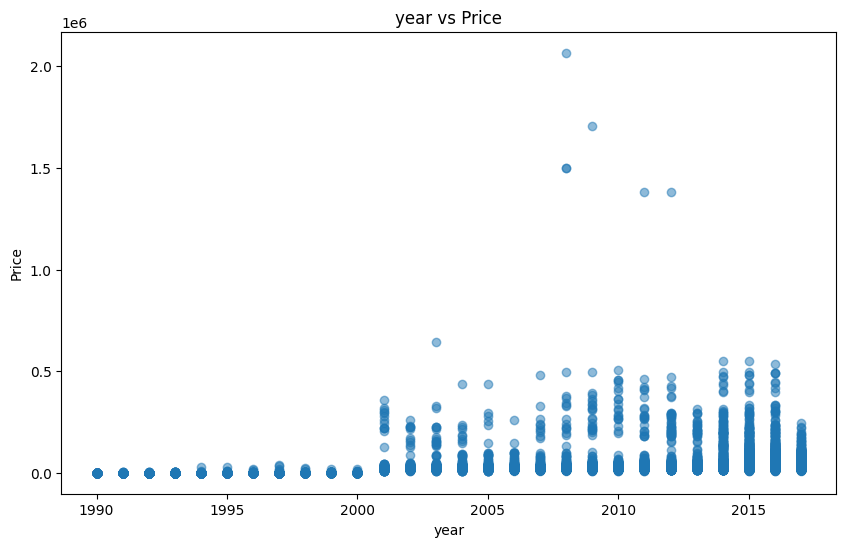

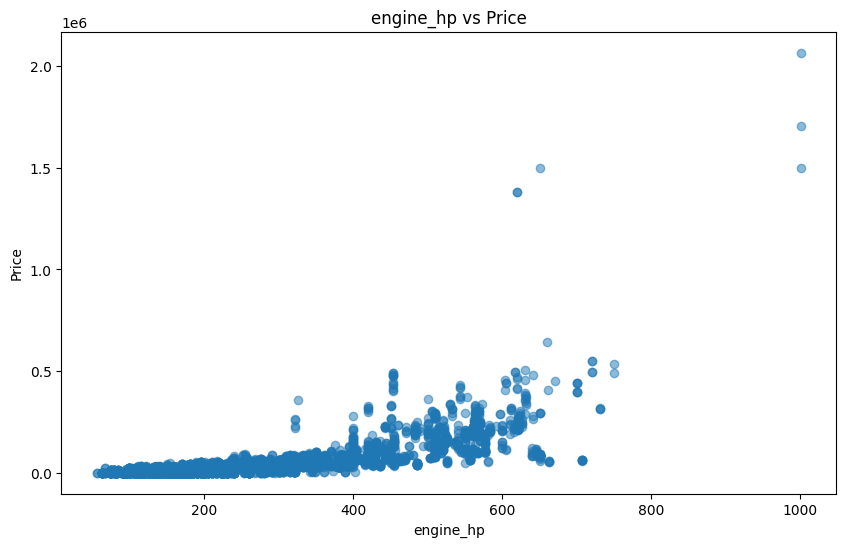

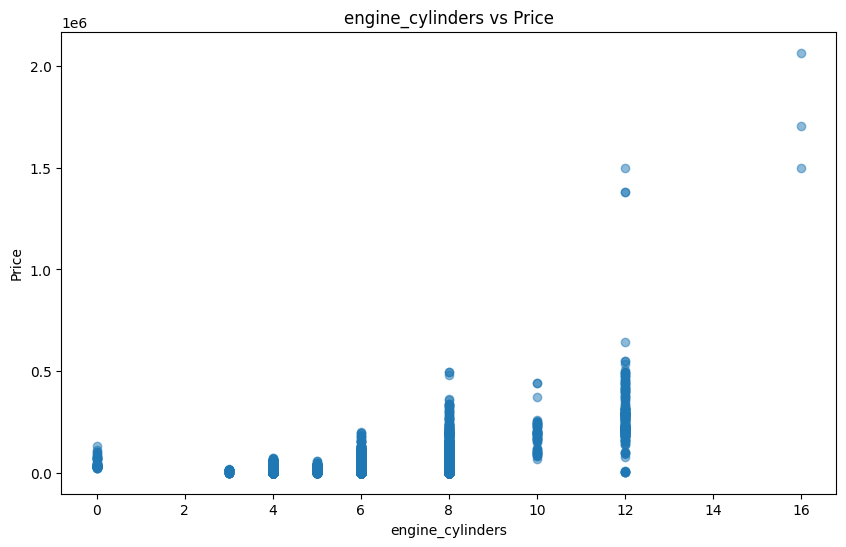

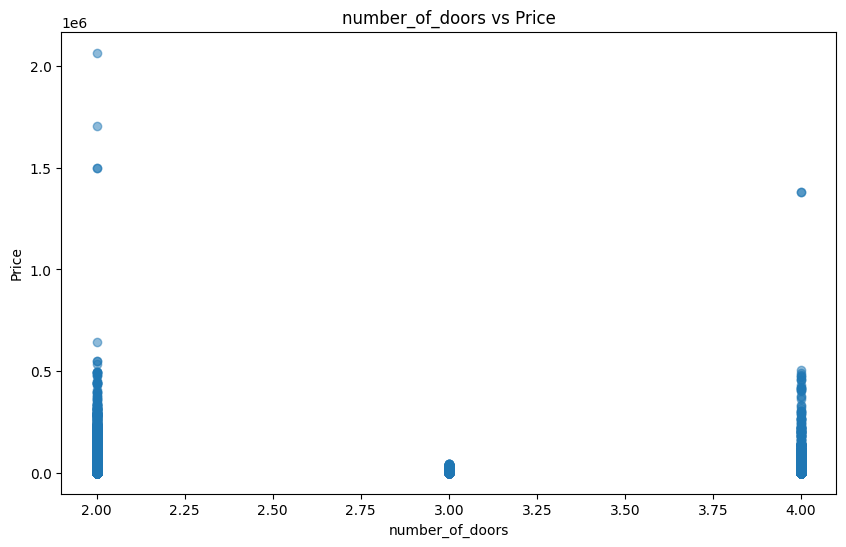

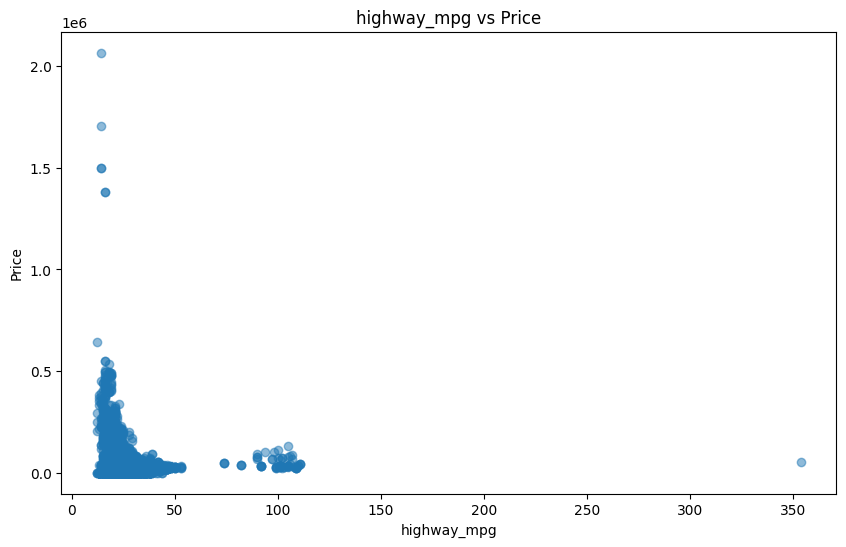

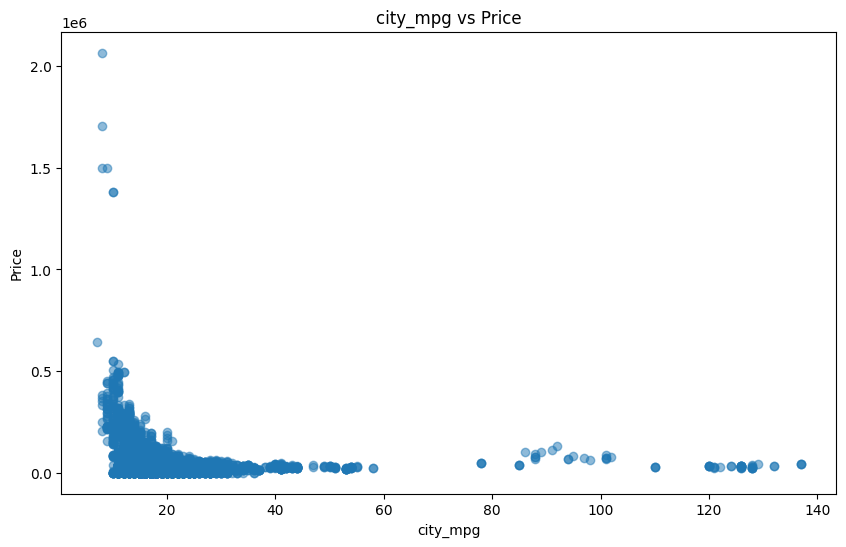

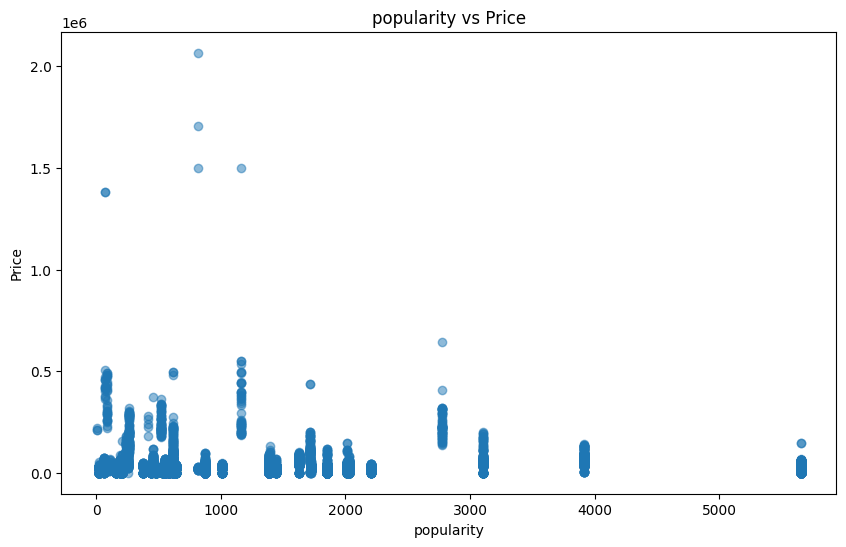

In [16]:
# Checking relationships with Price
for col in numeric_cols:
    if col != 'msrp':
        plt.figure(figsize=(10, 6))
        plt.scatter(df[col], df['msrp'], alpha=0.5)
        plt.title(f'{col} vs Price')
        plt.xlabel(col)
        plt.ylabel('Price')
        plt.show()

<h3>Checking Annual Trends

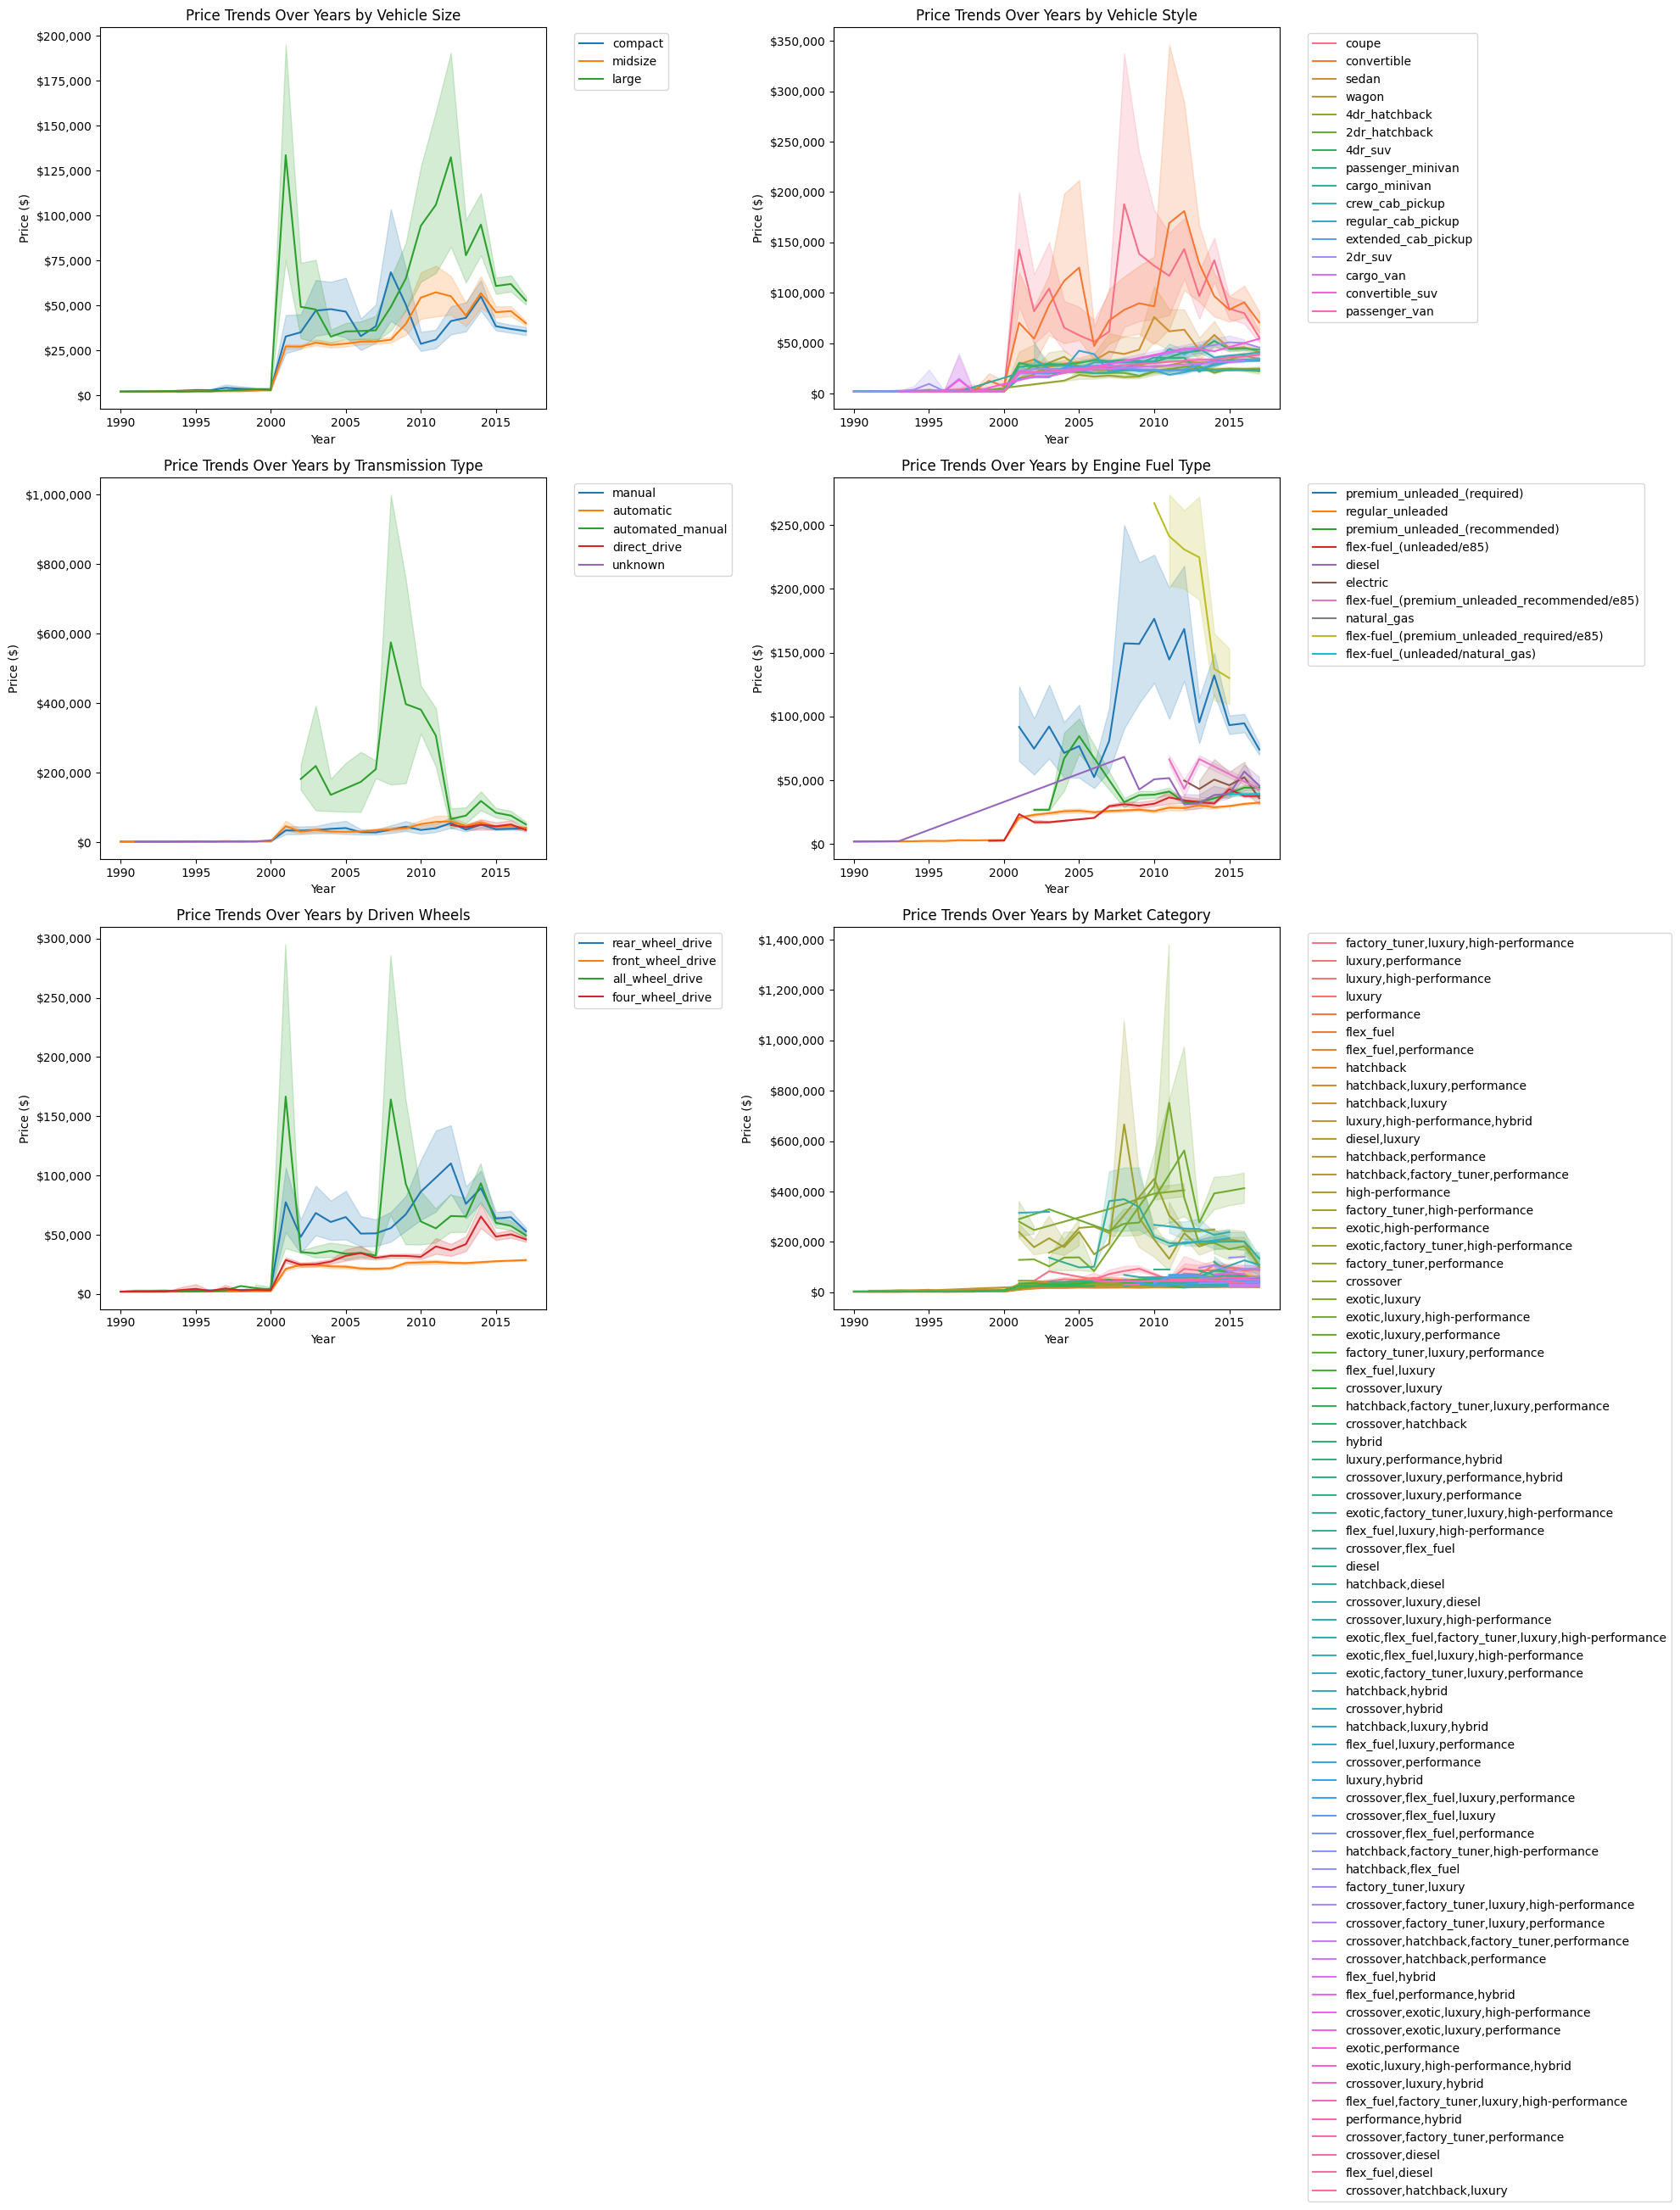

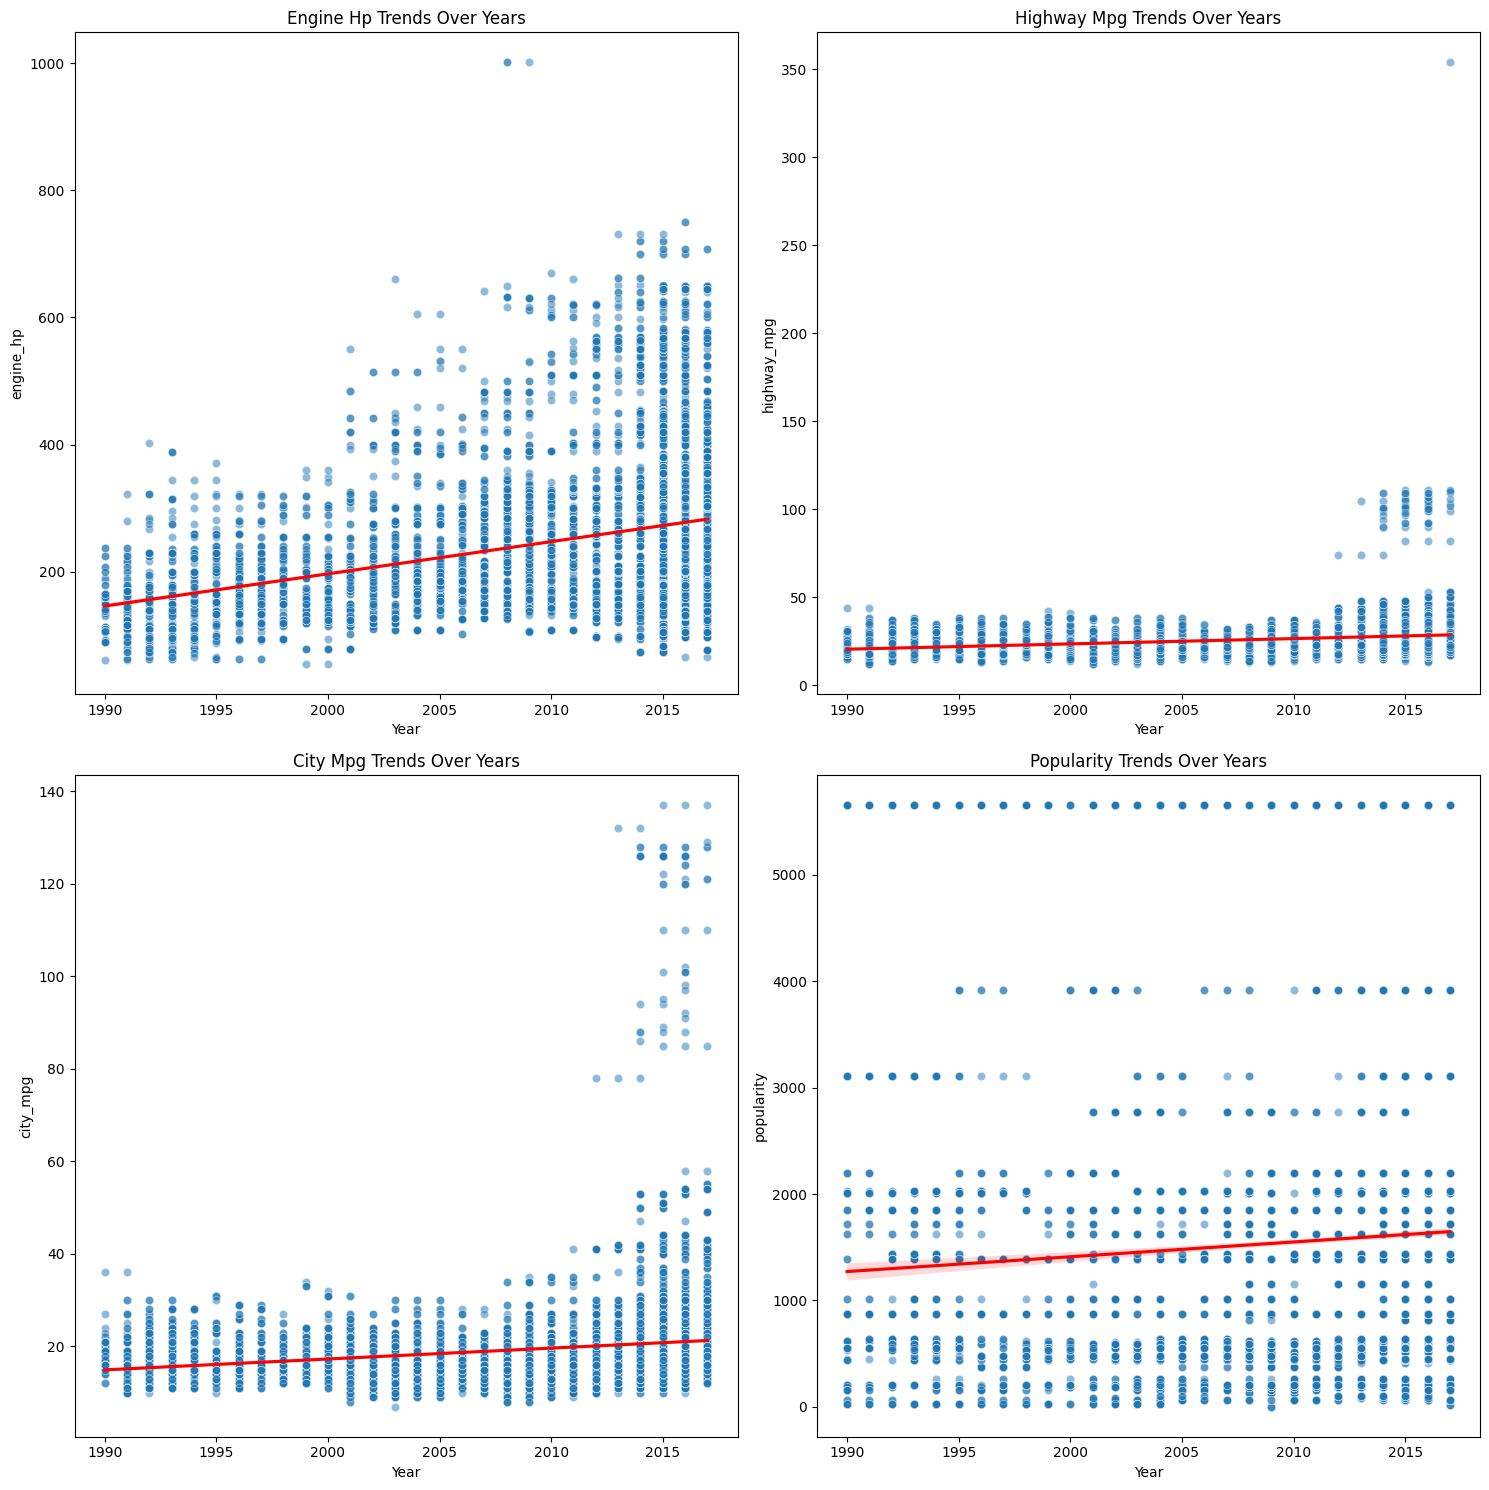


Yearly Trends Summary:
          msrp                 engine_hp engine_cylinders highway_mpg city_mpg
          mean    median count      mean             mean        mean     mean
year                                                                          
1990  2,020.20  2,000.00   123    141.13             5.29       23.07    17.09
1991  2,080.66  2,000.00   152    147.79             5.72       22.15    16.28
1992  2,077.74  2,000.00   177    151.40             5.35       24.05    17.89
1993  2,187.33  2,000.00   209    155.58             5.34       24.21    18.06
1994  2,312.03  2,000.00   163    157.15             5.40       23.87    17.66
1995  2,606.78  2,000.00   135    174.67             5.52       23.23    17.06
1996  2,497.37  2,000.00   131    173.58             5.31       23.73    17.57
1997  3,105.21  2,178.00   175    184.87             5.68       22.31    16.49
1998  2,975.60  2,654.00   154    190.05             6.00       21.85    16.08
1999  3,096.16  2,800.00   1

In [60]:
categorical_cols = ['vehicle_size', 'vehicle_style', 'transmission_type', 
                   'engine_fuel_type', 'driven_wheels', 'market_category']

fig, axes = plt.subplots(3, 2, figsize=(20, 25))
axes = axes.ravel()

for idx, col in enumerate(categorical_cols):
    sns.lineplot(data=df, x='year', y='msrp', hue=col, ax=axes[idx])
    axes[idx].set_title(f'Price Trends Over Years by {col.replace("_", " ").title()}')
    axes[idx].set_xlabel('Year')
    axes[idx].set_ylabel('Price ($)')
    axes[idx].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[idx].yaxis.set_major_formatter(lambda x, p: f'${x:,.0f}')

plt.tight_layout()
plt.show()

numerical_cols = ['engine_hp', 'highway_mpg', 'city_mpg', 'popularity']

fig, axes = plt.subplots(2, 2, figsize=(15, 15))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    sns.scatterplot(data=df, x='year', y=col, ax=axes[idx], alpha=0.5)
    sns.regplot(data=df, x='year', y=col, ax=axes[idx], scatter=False, color='red')
    axes[idx].set_title(f'{col.replace("_", " ").title()} Trends Over Years')
    axes[idx].set_xlabel('Year')

plt.tight_layout()
plt.show()

# Calculate average yearly trends
yearly_trends = df.groupby('year').agg({
    'msrp': ['mean', 'median', 'count'],
    'engine_hp': 'mean',
    'engine_cylinders': 'mean',
    'highway_mpg': 'mean',
    'city_mpg': 'mean'
}).round(2)

print("\nYearly Trends Summary:")
print(yearly_trends)

<h3>Validation and Test Framework

In [17]:
n = len(df)

# Setting 60-20-20 split
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

n_val, n_test, n_train

(2382, 2382, 7150)

In [18]:
# Rearranging rows randomly
idx = np.arange(n)
np.random.shuffle(idx)

# Splitting data 
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [19]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [20]:
# Reseting index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [21]:
# Getting target (y) values
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

<h3>Linear Regression

In [26]:
# Handling any category that appears in validation/test but not in training
def prepare_features(df_train, df_val=None, df_test=None, first_time=True):
    df_train = df_train.copy()

    df_train = handle_missing_values(df_train)
    if df_val is not None:
        df_val = handle_missing_values(df_val.copy())
    if df_test is not None:
        df_test = handle_missing_values(df_test.copy())
    
    numerical = ['year', 'engine_hp', 'engine_cylinders', 'number_of_doors', 
                'highway_mpg', 'city_mpg', 'popularity']
    categorical = ['model', 'engine_fuel_type', 'transmission_type', 
                  'driven_wheels', 'market_category', 'vehicle_size', 
                  'vehicle_style']
    
    # Scale numerical features
    scaler = StandardScaler()
    train_scaled = pd.DataFrame(
        scaler.fit_transform(df_train[numerical]),
        columns=numerical
    )
    
    # Get dummy variables for categorical columns
    dummies = {}
    train_encoded = pd.DataFrame()
    
    for col in categorical:
        dummies[col] = pd.get_dummies(df_train[col], prefix=col, drop_first=True)
        train_encoded = pd.concat([train_encoded, dummies[col]], axis=1)
    
    # Combine features
    final_train = pd.concat([train_scaled, train_encoded], axis=1)
    
    if df_val is not None and df_test is not None:
        # Scale validation and test numerical features
        val_scaled = pd.DataFrame(
            scaler.transform(df_val[numerical]),
            columns=numerical
        )
        test_scaled = pd.DataFrame(
            scaler.transform(df_test[numerical]),
            columns=numerical
        )
        
        # Create dummy variables for validation and test sets with same columns as training
        val_encoded = pd.DataFrame()
        test_encoded = pd.DataFrame()
        
        for col in categorical:
            val_dummies = pd.get_dummies(df_val[col], prefix=col)

            for col_name in dummies[col].columns:
                if col_name not in val_dummies.columns:
                    val_dummies[col_name] = 0

            val_dummies = val_dummies[dummies[col].columns]
            val_encoded = pd.concat([val_encoded, val_dummies], axis=1)

            test_dummies = pd.get_dummies(df_test[col], prefix=col)

            for col_name in dummies[col].columns:
                if col_name not in test_dummies.columns:
                    test_dummies[col_name] = 0

            test_dummies = test_dummies[dummies[col].columns]
            test_encoded = pd.concat([test_encoded, test_dummies], axis=1)
        
        # Combine features
        final_val = pd.concat([val_scaled, val_encoded], axis=1)
        final_test = pd.concat([test_scaled, test_encoded], axis=1)
        
        # Ensure all datasets have the same columns in the same order
        final_val = final_val[final_train.columns]
        final_test = final_test[final_train.columns]
        
        return final_train, final_val, final_test, scaler
    
    return final_train, scaler

In [27]:
# Prepare all datasets together
X_train, X_val, X_test, scaler = prepare_features(df_train, df_val, df_test)

# Prepare target variable
y_train = np.log1p(df_train['msrp'])
y_val = np.log1p(df_val['msrp'])
y_test = np.log1p(df_test['msrp'])

C:\Users\Aayush Pradhan\AppData\Local\Temp\ipykernel_22208\412510024.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['market_category'].fillna('not_specified', inplace=True)
c:\Users\Aayush Pradhan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Aayush Pradhan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty 

In [24]:
# Setting evaluation metrics
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    
    print(f'\n{model_name} Results:')
    print(f'RMSE: {rmse:.4f}')
    print(f'R2 Score: {r2:.4f}')
    
    # Create scatter plot of predicted vs actual values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('Actual log(MSRP)')
    plt.ylabel('Predicted log(MSRP)')
    plt.title(f'{model_name}: Actual vs Predicted Values')
    plt.tight_layout()
    plt.show()
    
    return rmse, r2

<h3>Method 1. Ridge Regression


Ridge Regression Results:
RMSE: 0.2428
R2 Score: 0.9498


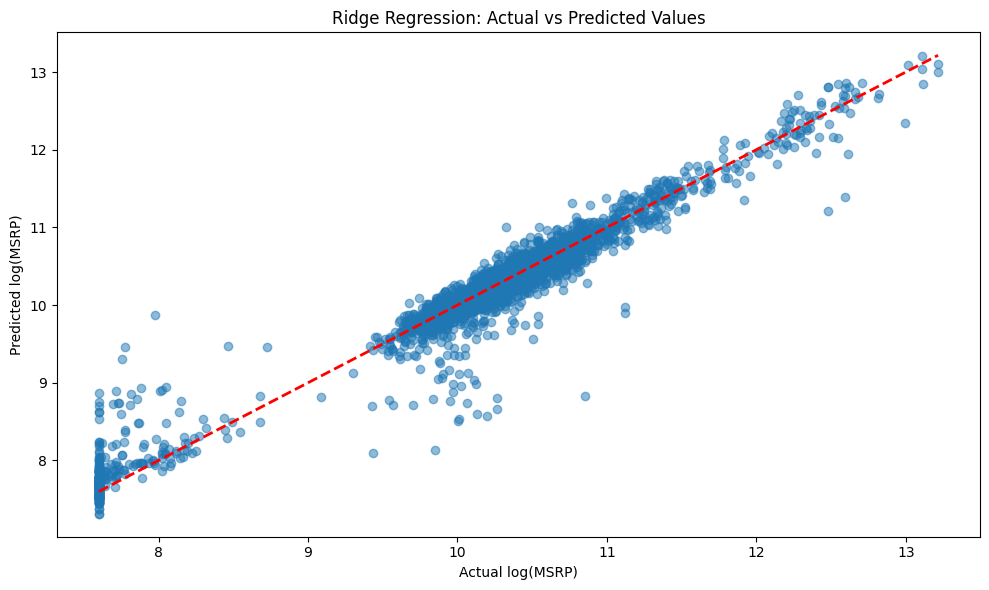

In [ ]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_val)
ridge_metrics = evaluate_model(y_val, ridge_pred, 'Ridge Regression')

<h3>Method 2. Random Forest


Random Forest Results:
RMSE: 0.1201
R2 Score: 0.9877


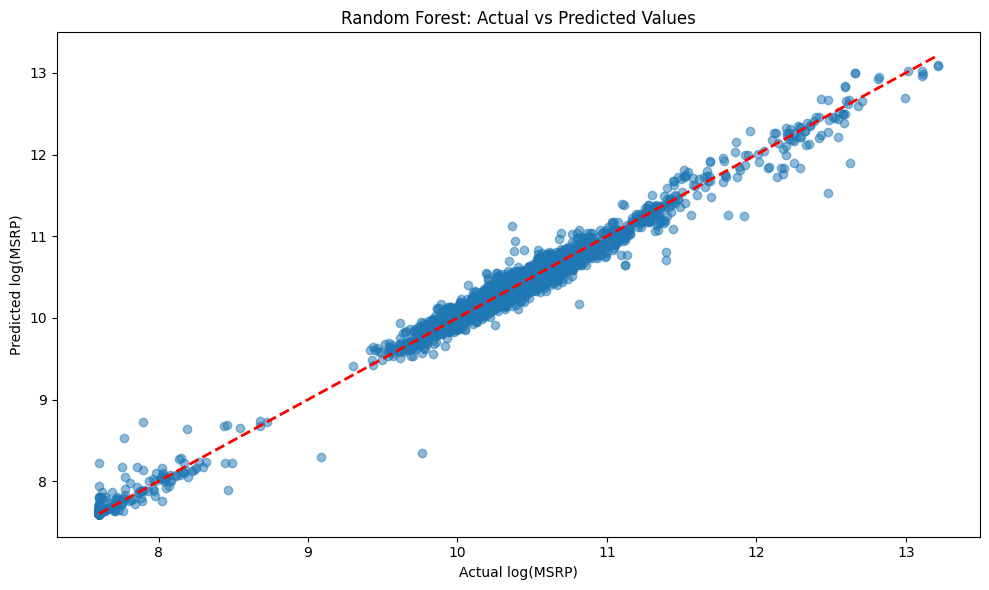

In [29]:
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=20,
    min_samples_leaf=4,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_val)
rf_metrics = evaluate_model(y_val, rf_pred, 'Random Forest')

<h3>Method 3. XGBoost


XGBoost Results:
RMSE: 0.1209
R2 Score: 0.9875


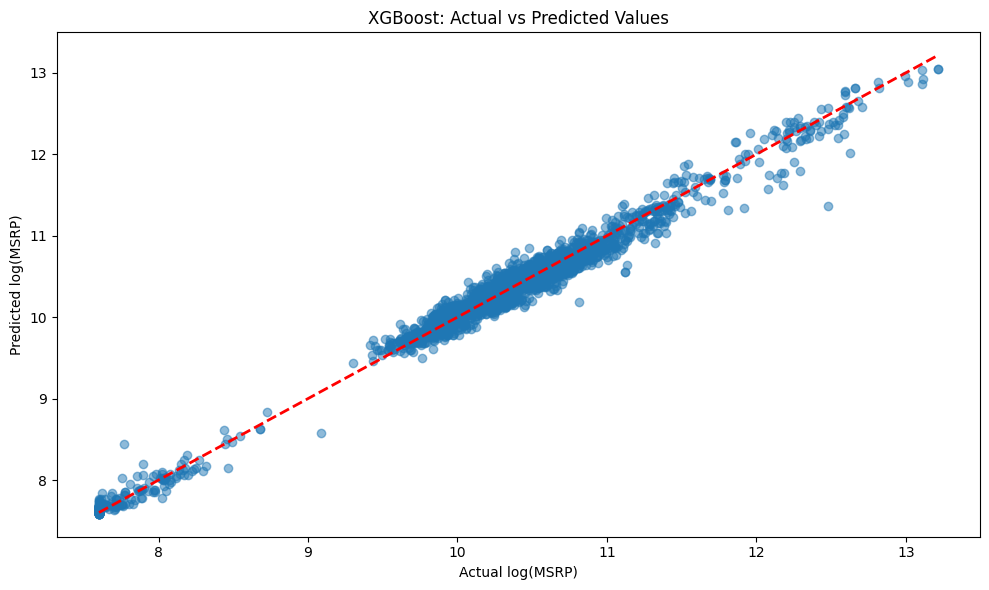

In [ ]:
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1
)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_val)
xgb_metrics = evaluate_model(y_val, xgb_pred, 'XGBoost')

<h3>Method 4. Tuned Random Forest

Starting Random Forest hyperparameter tuning...
Fitting 5 folds for each of 8 candidates, totalling 40 fits

Best parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best RMSE: 0.12143760646819479

Tuned Random Forest Results:
RMSE: 0.1107
R2 Score: 0.9896


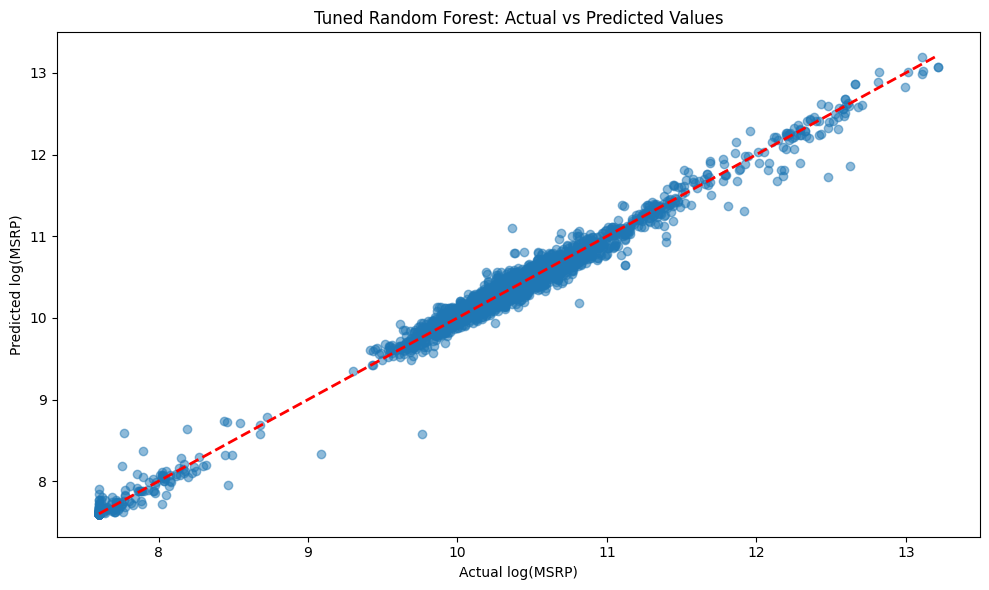

In [ ]:
param_grid = {
    'n_estimators': [100], 
    'max_depth': [15, 20],  
    'min_samples_leaf': [2, 4], 
    'min_samples_split': [2, 5]  
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)
print("\nBest parameters:", grid_search.best_params_)
print("Best RMSE:", -grid_search.best_score_)

# Use the best model
best_rf = grid_search.best_estimator_
best_rf_pred = best_rf.predict(X_val)
best_rf_metrics = evaluate_model(y_val, best_rf_pred, 'Tuned Random Forest')

<h3>Method 5. Ensemble (Tuned RF and XGBoost)


Creating ensemble of tuned RF and XGBoost...

Ensemble Results:
RMSE: 0.1105
R2 Score: 0.9896


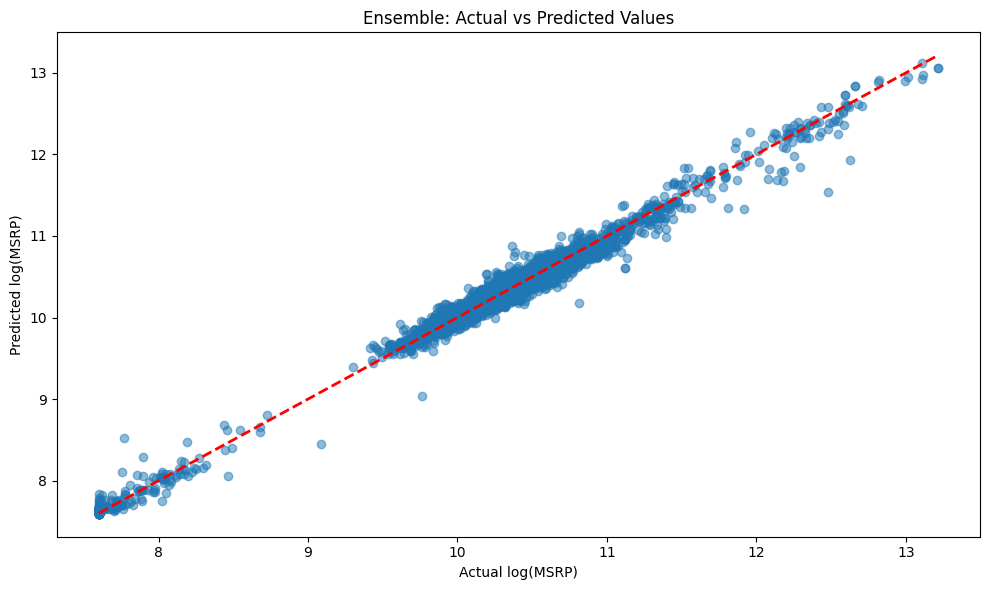

In [42]:
def ensemble_predict(rf_model, xgb_model, X):
    rf_pred = rf_model.predict(X)
    xgb_pred = xgb_model.predict(X)
    return (rf_pred + xgb_pred) / 2

ensemble_pred = ensemble_predict(best_rf, xgb_model, X_val)
ensemble_metrics = evaluate_model(y_val, ensemble_pred, 'Ensemble')

In [45]:
# Comparing models
models_comparison = pd.DataFrame({
    'Model': ['Ridge', 'Random Forest', 'XGBoost', 'Tuned RF', 'Ensemble'],
    'RMSE': [ridge_metrics[0], rf_metrics[0], xgb_metrics[0], 
             best_rf_metrics[0], ensemble_metrics[0]],
    'R2': [ridge_metrics[1], rf_metrics[1], xgb_metrics[1],
           best_rf_metrics[1], ensemble_metrics[1]]
})

print("\nFinal Model Comparison:")
print(models_comparison.sort_values('RMSE'))


Final Model Comparison:
           Model      RMSE        R2
4       Ensemble  0.110482  0.989601
3       Tuned RF  0.110716  0.989557
1  Random Forest  0.120126  0.987707
2        XGBoost  0.120900  0.987548
0          Ridge  0.242799  0.949779


<h4>Analyzing the results:</h4>

The <b>Ensemble</b> model performed best:

RMSE:   0.110482 (lowest)  | 
R²:     0.98960  (highest).  
This shows combining Tuned RF and XGBoost helped reduce errors 

Example: Prediction using Ensemle

In [ ]:
final_predictions = ensemble_predict(best_rf, xgb_model, X_val)

# Converting log predictions to dollars
actual_prices = np.exp(y_val)
predicted_prices = np.exp(final_predictions)

# Creating a DataFrame with original features and predictions
results_df = df_val.copy()
results_df['Predicted_Price'] = predicted_prices
results_df['Actual_Price'] = results_df['msrp']
results_df['Percentage_Error'] = abs(results_df['Predicted_Price'] - results_df['Actual_Price']) / results_df['Actual_Price'] * 100

display_columns = ['model', 'year', 'Actual_Price', 'Predicted_Price', 'Percentage_Error']

print("\nExample Predictions:")
print("-" * 80)
results_display = results_df[display_columns].head(10)

pd.options.display.float_format = '{:,.2f}'.format
print(results_display)

print(f"\nAverage Percentage Error: {results_df['Percentage_Error'].mean():.2f}%")


Example Predictions with Features:
----------------------------------------------------------------------------------------------------
                 model  year  Actual_Price  Predicted_Price  Percentage_Error
0                aztek  2004         24190        25,617.38              5.90
1                   xc  2002         36500        31,528.90             13.62
2      ram_pickup_1500  2010         31020        31,320.20              0.97
3               encore  2015         29450        27,453.23              6.78
4              terrain  2017         27300        27,617.86              1.16
5                  wrx  2017         28995        30,219.50              4.22
6             cavalier  2003         17030        15,993.15              6.09
7  sierra_1500_classic  2007         25850        27,924.88              8.03
8             1_series  2012         31200        36,671.11             17.54
9                prius  2017         25165        26,739.00              6.25

Aver